In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms

In [232]:
path = "/content/drive/MyDrive/ML/airline_passengers.csv"
df_airline = pd.read_csv(path)
df=df_airline
df_airline.head(10)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [233]:
df_airline.isnull().sum()
# checking for null values
# we see there is 1 null values

Month                      0
Thousands of Passengers    1
dtype: int64

In [234]:
# we drop that value
df_airline.dropna(axis=0, inplace = True)

In [235]:
df_airline.info()
# we see month is object type and not date type
# we convert it to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [236]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [237]:
# setting month as index
df_airline.set_index('Month', inplace = True)


In [238]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

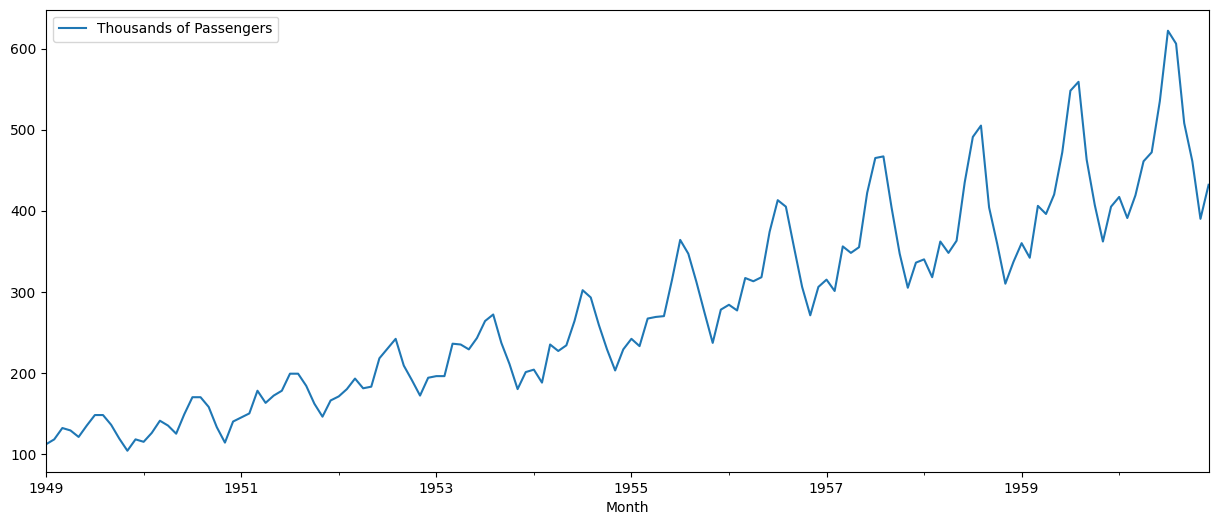

In [239]:
df_airline.plot(figsize=(15,6))
# we see it's seasonal Data

In [240]:
# to see if data is stationary or not(of course it is not , but to see it by df test)
from statsmodels.tsa.stattools import adfuller

In [241]:
# writing function for adf test
def adftest(series):
    result = adfuller(series)
    print('ADF Statistics : {}'.format(result[0]))
    print('P Value : {}'.format(result[1]))
    if result[1]<0.05 :
        print("Null Hypothesis Rejected, Data is Stationary")
    else :
        print("Null Hypothesis Accepted, Data is not Stationary")

In [242]:
adftest(df_airline['Thousands of Passengers'])

ADF Statistics : 0.8153688792060498
P Value : 0.991880243437641
Null Hypothesis Accepted, Data is not Stationary


In [243]:
df_airline['12 diff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)


In [244]:
df_airline

,Thousands of Passengers,12 diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1960-08-01,606.0,47.0
1960-09-01,508.0,45.0
1960-10-01,461.0,54.0


In [245]:
adftest(df_airline['12 diff'].dropna())
# first drop NaN values and then do ADF test
# still data is not stationary as p vale > 0.05

ADF Statistics : -3.383020726492481
P Value : 0.011551493085514952
Null Hypothesis Rejected, Data is Stationary


In [246]:
df_airline

,Thousands of Passengers,12 diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1960-08-01,606.0,47.0
1960-09-01,508.0,45.0
1960-10-01,461.0,54.0


In [247]:
df_airline['12/1 diff'] = df_airline['12 diff'] - df_airline['12 diff'].shift(1)
df_airline.head(15)

,Thousands of Passengers,12 diff,12/1 diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
1949-06-01,135.0,NaN,NaN
1949-07-01,148.0,NaN,NaN
1949-08-01,148.0,NaN,NaN
1949-09-01,136.0,NaN,NaN


In [248]:
adftest(df_airline['12/1 diff'].dropna())

ADF Statistics : -15.595618083746338
P Value : 1.856511600123444e-28
Null Hypothesis Rejected, Data is Stationary


<Axes: xlabel='Month'>

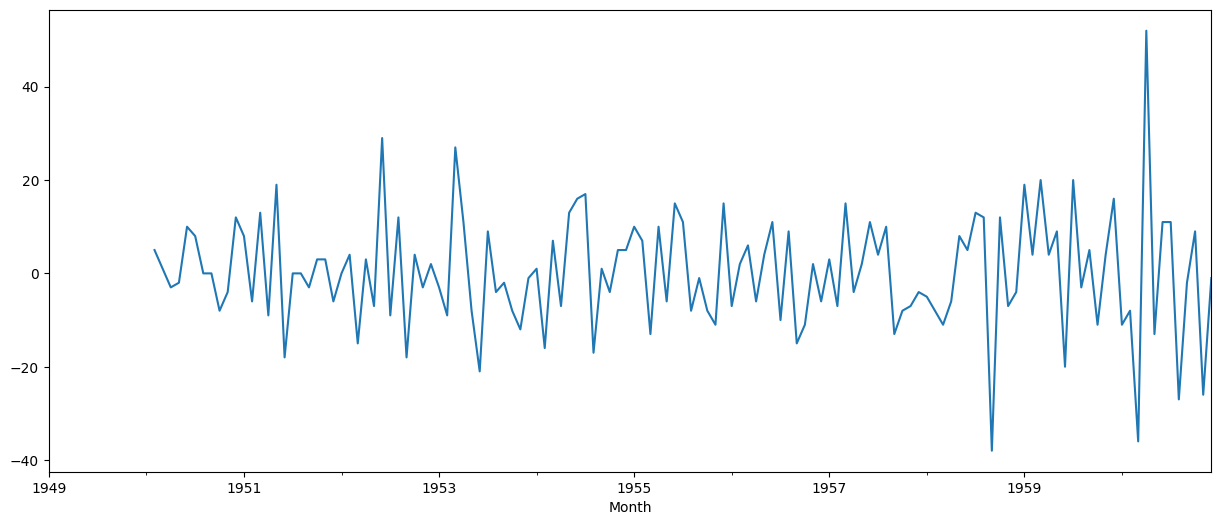

In [249]:
df_airline['12/1 diff'].plot(figsize=(15,6))

## **Plotting ACF and PACF plots**

In [250]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# library for acf and pacf plot

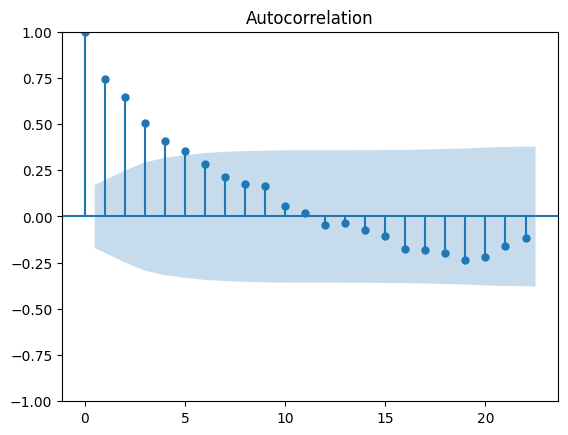

In [251]:
acf = plot_acf(df_airline['12 diff'].dropna())

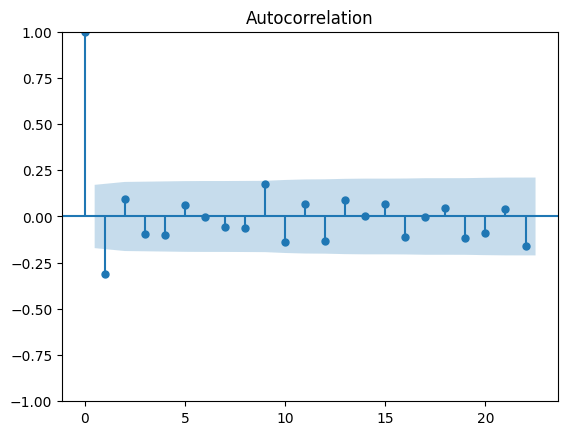

In [252]:
acf_fs = plot_acf(df_airline["12/1 diff"].dropna())
# we see it is over fitting so we use 12 diff and not 12/1 diff

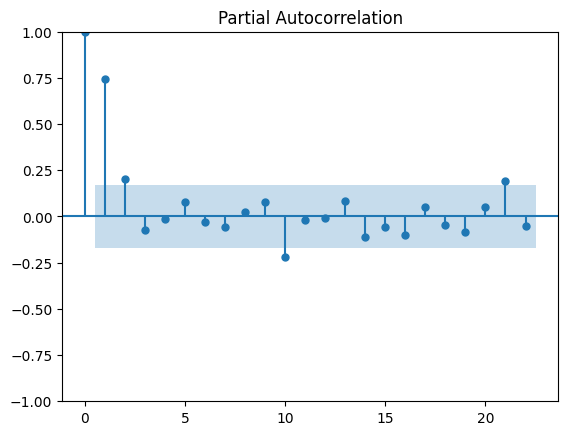

In [253]:
pacf = plot_pacf(df_airline['12 diff'].dropna())

In [254]:
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA

In [255]:
train_end = datetime(1957,12,1)
test_start = datetime(1958,1,1,)

In [256]:
train_data = df_airline[:train_end]
test_data = df_airline[test_start:]

In [257]:
test_data

,Thousands of Passengers,12 diff,12/1 diff
Month,,,
1958-01-01,340.0,25.0,-5.0
1958-02-01,318.0,17.0,-8.0
1958-03-01,362.0,6.0,-11.0
1958-04-01,348.0,0.0,-6.0
1958-05-01,363.0,8.0,8.0
1958-06-01,435.0,13.0,5.0
1958-07-01,491.0,26.0,13.0
1958-08-01,505.0,38.0,12.0
1958-09-01,404.0,0.0,-38.0


# **ARIMA MODEL**

In [258]:
model_arima = ARIMA(train_data['Thousands of Passengers'],order = (12,0,4)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [259]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                  108
Model:                     ARIMA(12, 0, 4)   Log Likelihood                -428.757
Date:                     Tue, 02 Jan 2024   AIC                            893.515
Time:                             13:10:47   BIC                            941.793
Sample:                         01-01-1949   HQIC                           913.090
                              - 12-01-1957                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.9009   1797.644      0.128      0.898   -3292.416    3754.218
ar.L1          0.2947      0.186      1.582      0.114      -0.070       0.660
ar.L2         -0.3077      0.207     -1.487      0.137      -0.713       0.098
ar.L3          0.3851      0.185      2.086      0.037       0.023       0.747
ar.L4         -0.2720      0.195     -1.395      0.163      -0.654       0.110
ar.L5          0.3735      0.185      2.013      0.044       0.010       0.737
ar.L6         -0.3049      0.163     -1.867      0.062      -0.625       0.015
ar.L7          0.2893      0.184      1.573      0.116      -0.071       0.650
ar.L8         -0.3052      0.164     -1.864      0.062      -0.626       0.016
ar.L9          0.2749      0.164      1.672      0.094      -0.047       0.597
ar.L10        -0.3216      0.156     -2.064      0.039      -0.627      -0.016
ar.L11         0.2602      0.166      1.567      0.117      -0.065       0.586
ar.L12         0.6310      0.171      3.683      0.000       0.295       0.967
ma.L1          0.8935      0.211      4.237      0.000       0.480       1.307
ma.L2          1.2985      0.145      8.963      0.000       1.015       1.582
ma.L3          0.6544      0.193      3.384      0.001       0.275       1.033
ma.L4          0.4220      0.128      3.309      0.001       0.172       0.672
sigma2       140.3740     29.037      4.834      0.000      83.463     197.285
===================================================================================
Ljung-Box (L1) (Q):                   2.89   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.09   Prob(JB):                         0.99
Heteroskedasticity (H):               2.41   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [260]:
pred_arima = model_arima.predict(start = datetime(1958,1,1), end = datetime(1960,12,1))
pred_arima

1958-01-01    341.239889
1958-02-01    315.157322
1958-03-01    357.778700
1958-04-01    338.325328
1958-05-01    341.009252
1958-06-01    404.551253
1958-07-01    446.062431
1958-08-01    452.647635
1958-09-01    403.587430
1958-10-01    357.603394
1958-11-01    327.382420
1958-12-01    355.813732
1959-01-01    353.958127
1959-02-01    319.439903
1959-03-01    354.461584
1959-04-01    332.891000
1959-05-01    331.163098
1959-06-01    391.390304
1959-07-01    428.007602
1959-08-01    437.728627
1959-09-01    399.442782
1959-10-01    362.952221
1959-11-01    343.293699
1959-12-01    370.922108
1960-01-01    364.545444
1960-02-01    325.258765
1960-03-01    354.906709
1960-04-01    332.143805
1960-05-01    325.838000
1960-06-01    381.612772
1960-07-01    412.343187
1960-08-01    423.277824
1960-09-01    393.537261
1960-10-01    364.444899
1960-11-01    354.032988
1960-12-01    381.642290
Freq: MS, Name: predicted_mean, dtype: float64

In [261]:
df_airline = pd.concat([df_airline,pred_arima], axis =1 )
df_airline

,Thousands of Passengers,12 diff,12/1 diff,predicted_mean
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,NaN
1949-05-01,121.0,NaN,NaN,NaN
...,...,...,...,...
1960-08-01,606.0,47.0,-27.0,423.277824
1960-09-01,508.0,45.0,-2.0,393.537261
1960-10-01,461.0,54.0,9.0,364.444899
1960-11-01,390.0,28.0,-26.0,354.032988


In [262]:
df_airline.rename(columns={"predicted_mean": "pred_arima"}, inplace=True)
df_airline

,Thousands of Passengers,12 diff,12/1 diff,pred_arima
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,NaN
1949-05-01,121.0,NaN,NaN,NaN
...,...,...,...,...
1960-08-01,606.0,47.0,-27.0,423.277824
1960-09-01,508.0,45.0,-2.0,393.537261
1960-10-01,461.0,54.0,9.0,364.444899
1960-11-01,390.0,28.0,-26.0,354.032988


<Axes: >

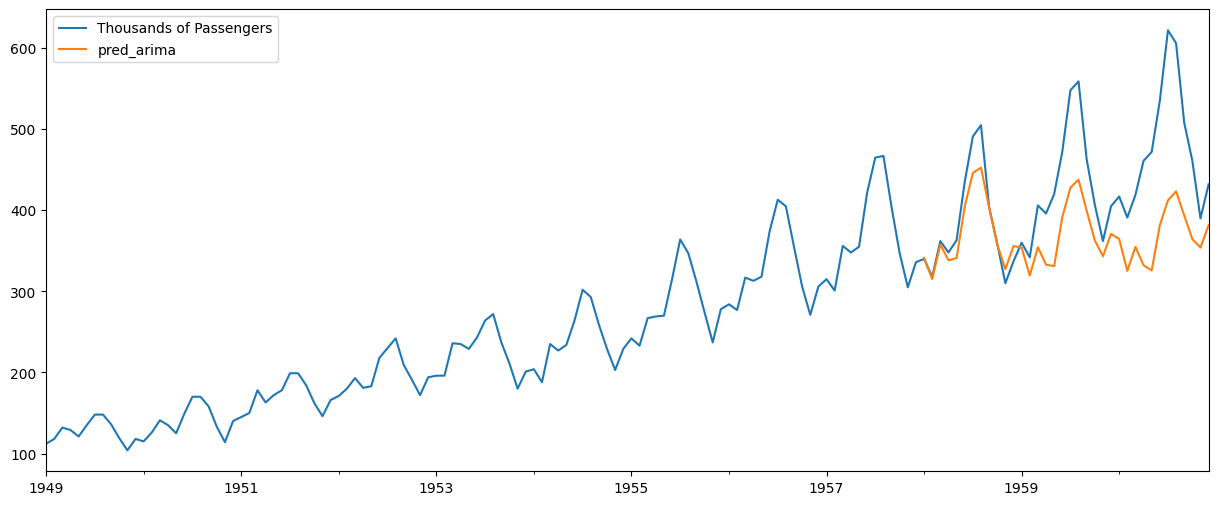

In [263]:
df_airline[['Thousands of Passengers','pred_arima']].plot(figsize=(15,6))

# **SARIMAX MODEL**

In [264]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [265]:
model_sarima = SARIMAX(train_data['Thousands of Passengers'],order = (1,0,1),seasonal_order = (2,1,2,12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [266]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                 Thousands of Passengers   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -348.622
Date:                                 Tue, 02 Jan 2024   AIC                            711.245
Time:                                         13:10:54   BIC                            729.195
Sample:                                     01-01-1949   HQIC                           718.500
                                          - 12-01-1957                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9638      0.035     27.877      0.000       0.896       1.032
ma.L1         -0.2502      0.104     -2.412      0.016      -0.454      -0.047
ar.S.L12       1.3718      0.533      2.572      0.010       0.327       2.417
ar.S.L24      -0.4500      0.827     -0.544      0.586      -2.071       1.171
ma.S.L12      -1.7829     13.969     -0.128      0.898     -29.161      25.595
ma.S.L24       0.9840     15.974      0.062      0.951     -30.324      32.292
sigma2        61.9536    933.194      0.066      0.947   -1767.074    1890.981
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.18
Prob(Q):                              0.80   Prob(JB):                         0.20
Heteroskedasticity (H):               1.14   Skew:                             0.45
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
pred_sarima = model_sarima.predict(start = datetime(1958,1,1), end = datetime(1960,12,1))
pred_sarima

1958-01-01    347.272656
1958-02-01    329.487324
1958-03-01    385.154634
1958-04-01    379.745950
1958-05-01    386.664866
1958-06-01    453.633088
1958-07-01    501.675198
1958-08-01    496.630804
1958-09-01    432.837620
1958-10-01    375.376740
1958-11-01    331.009551
1958-12-01    366.034801
1959-01-01    377.680981
1959-02-01    356.688767
1959-03-01    415.145318
1959-04-01    411.279847
1959-05-01    418.537495
1959-06-01    491.909469
1959-07-01    544.664166
1959-08-01    536.094383
1959-09-01    468.111392
1959-10-01    405.880198
1959-11-01    358.421665
1959-12-01    396.136078
1960-01-01    408.576037
1960-02-01    384.753989
1960-03-01    446.607316
1960-04-01    443.568193
1960-05-01    451.206981
1960-06-01    533.262214
1960-07-01    590.101170
1960-08-01    579.757812
1960-09-01    506.280632
1960-10-01    437.613125
1960-11-01    386.882938
1960-12-01    426.382239
Freq: MS, Name: predicted_mean, dtype: float64

In [268]:
df_full = pd.concat([df_airline,pred_sarima], axis =1 )
df_full.tail(50)

,Thousands of Passengers,12 diff,12/1 diff,pred_arima,predicted_mean
1956-11-01,271.0,34.0,2.0,NaN,NaN
1956-12-01,306.0,28.0,-6.0,NaN,NaN
1957-01-01,315.0,31.0,3.0,NaN,NaN
1957-02-01,301.0,24.0,-7.0,NaN,NaN
1957-03-01,356.0,39.0,15.0,NaN,NaN
1957-04-01,348.0,35.0,-4.0,NaN,NaN
1957-05-01,355.0,37.0,2.0,NaN,NaN
1957-06-01,422.0,48.0,11.0,NaN,NaN
1957-07-01,465.0,52.0,4.0,NaN,NaN
1957-08-01,467.0,62.0,10.0,NaN,NaN


In [269]:
df_full.rename(columns={"predicted_mean": "pred_sarima"}, inplace=True)
df_full

,Thousands of Passengers,12 diff,12/1 diff,pred_arima,pred_sarima
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,NaN,NaN
1949-05-01,121.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1960-08-01,606.0,47.0,-27.0,423.277824,579.757812
1960-09-01,508.0,45.0,-2.0,393.537261,506.280632
1960-10-01,461.0,54.0,9.0,364.444899,437.613125
1960-11-01,390.0,28.0,-26.0,354.032988,386.882938


<Axes: >

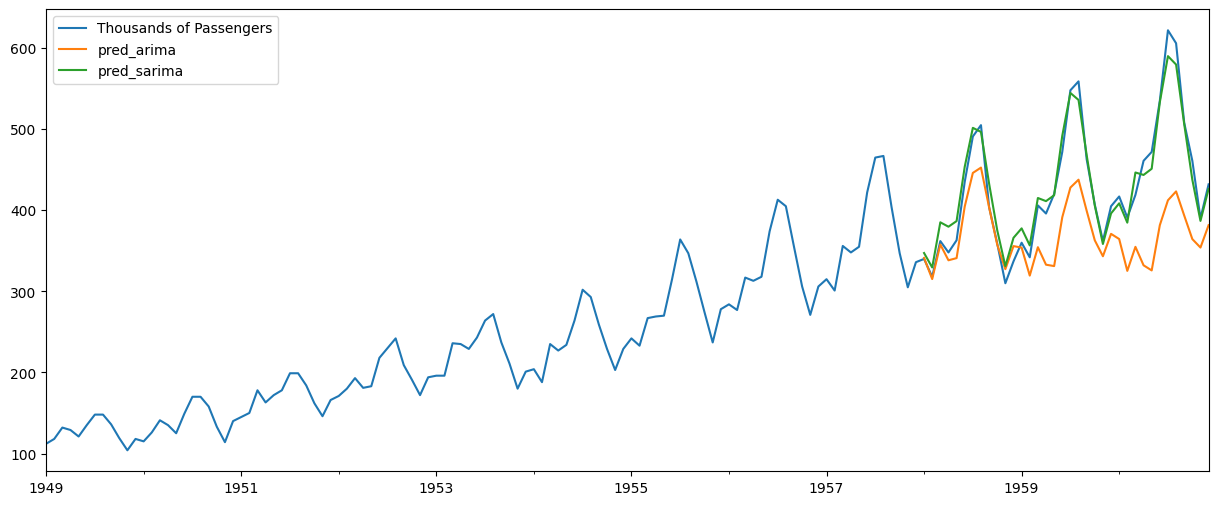

In [270]:
df_full[['Thousands of Passengers','pred_arima','pred_sarima']].plot(figsize=(15,6))

# **Finding Avg percentage error of Predicted Values**

In [271]:
diff_arima = (abs(df_full['Thousands of Passengers'] - df_full['pred_arima']))/df_full['Thousands of Passengers']
diff_arima.dropna(inplace=True)


In [272]:
diff_sarima = (abs(df_full['Thousands of Passengers'] - df_full['pred_sarima']))/df_full['Thousands of Passengers']
diff_sarima.dropna(inplace=True)

In [273]:
diff_sarima

1958-01-01    0.021390
1958-02-01    0.036124
1958-03-01    0.063963
1958-04-01    0.091224
1958-05-01    0.065192
1958-06-01    0.042835
1958-07-01    0.021742
1958-08-01    0.016573
1958-09-01    0.071380
1958-10-01    0.045618
1958-11-01    0.067773
1958-12-01    0.086157
1959-01-01    0.049114
1959-02-01    0.042950
1959-03-01    0.022525
1959-04-01    0.038585
1959-05-01    0.003482
1959-06-01    0.042181
1959-07-01    0.006087
1959-08-01    0.040976
1959-09-01    0.011040
1959-10-01    0.002751
1959-11-01    0.009885
1959-12-01    0.021886
1960-01-01    0.020201
1960-02-01    0.015974
1960-03-01    0.065889
1960-04-01    0.037813
1960-05-01    0.044053
1960-06-01    0.003248
1960-07-01    0.051284
1960-08-01    0.043304
1960-09-01    0.003385
1960-10-01    0.050731
1960-11-01    0.007992
1960-12-01    0.013004
Freq: MS, dtype: float64

In [276]:
arima_error =  np.mean(diff_arima)
arima_error * 100

12.967041652484697

In [278]:
sarima_error = np.mean(diff_sarima)
sarima_error*100

3.5508656736523063